In [1]:
import os
from concurrent.futures import ThreadPoolExecutor
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
from scipy.signal import convolve2d

### Paralell program

In [2]:
def sua_funcao(input1, input2):
    # Substitua esta função pela sua lógica de processamento
    time.sleep(2)  # Simulando uma operação demorada
    resultado = input1 + input2
    return resultado

def executar_em_paralelo(input1, input2):
    # Número de threads a serem usadas
    num_threads = 2

    # Criando um ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Iniciando as operações em paralelo
        futures = [executor.submit(sua_funcao, input1, input2) for _ in range(num_threads)]

        # Aguardando a conclusão de todas as operações
        resultados = [future.result() for future in futures]

    return resultados

# Exemplo de uso
input1 = 10
input2 = 20
resultados_paralelos = executar_em_paralelo(input1, input2)
print("Resultados em paralelo:", resultados_paralelos)


Resultados em paralelo: [30, 30]


In [3]:
from concurrent.futures import ThreadPoolExecutor
import time

def sua_funcao(par_inputs):
    # Substitua esta função pela sua lógica de processamento
    resultado = sum(par_inputs)  # Exemplo simples, pode ser mais complexo
    return resultado

def executar_em_paralelo(lista_pares_inputs):
    # Número de threads a serem usadas
    num_threads = os.cpu_count()

    # Criando um ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Iniciando as operações em paralelo
        futures = [executor.submit(sua_funcao, par) for par in lista_pares_inputs]

        # Aguardando a conclusão de todas as operações
        resultados = [future.result() for future in futures]

    # Criando o dicionário associando cada resultado aos seus inputs
    resultados_dict = {par: resultado for par, resultado in zip(lista_pares_inputs, resultados)}
    return resultados_dict

# Exemplo de uso
lista_pares_inputs = [(1, 2), (5, 6), (3, 4)]
resultados_paralelos = executar_em_paralelo(lista_pares_inputs)
print("Resultados em paralelo:", resultados_paralelos)


Resultados em paralelo: {(1, 2): 3, (5, 6): 11, (3, 4): 7}


### Running the code for multiple calues of densities

In [4]:
import functions as f

In [5]:
def generate_heatmap(data,title):
    # Extrair chaves e valores do dicionário
    keys = list(data.keys())
    values = list(data.values())

    # Obter valores únicos de agentDensity e residentRelativeDensity
    agent_density_values = np.unique([key[0] for key in keys])
    relative_density_values = np.unique([key[1] for key in keys])

    # Criar matriz de zeros para armazenar os valores do heatmap
    heatmap_data = np.zeros((len(relative_density_values), len(agent_density_values)))

    # Preencher a matriz com os valores do dicionário
    for i, agent_density in enumerate(agent_density_values):
        for j, relative_density in enumerate(relative_density_values):
            key = (agent_density, relative_density)
            if key in data:
                heatmap_data[j, i] = data[key]

    # Criar o heatmap
    plt.imshow(heatmap_data, cmap='viridis', extent=[0, 1,
                                                    0, 0.9],
               origin='lower', vmin=min(values), vmax=max(values))
    
    plt.colorbar(label=title)
    plt.xlabel('Agent Density')
    plt.ylabel('Relative Resident Density')
    plt.title(title + ' Heatmap')
    plt.show()

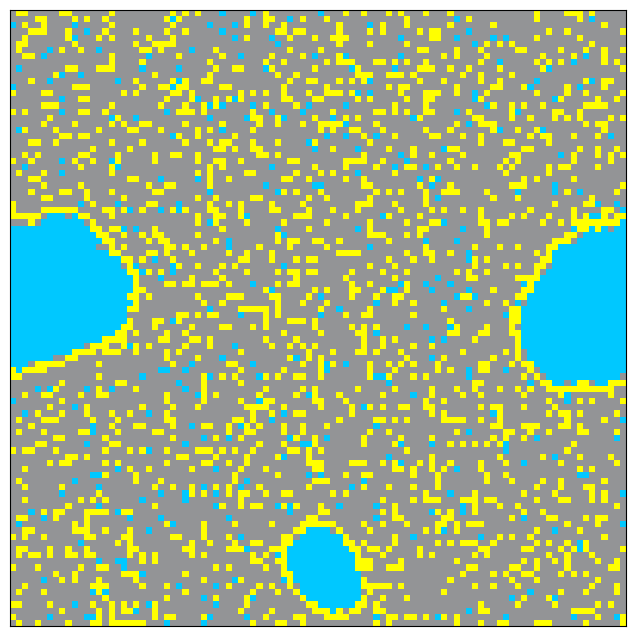

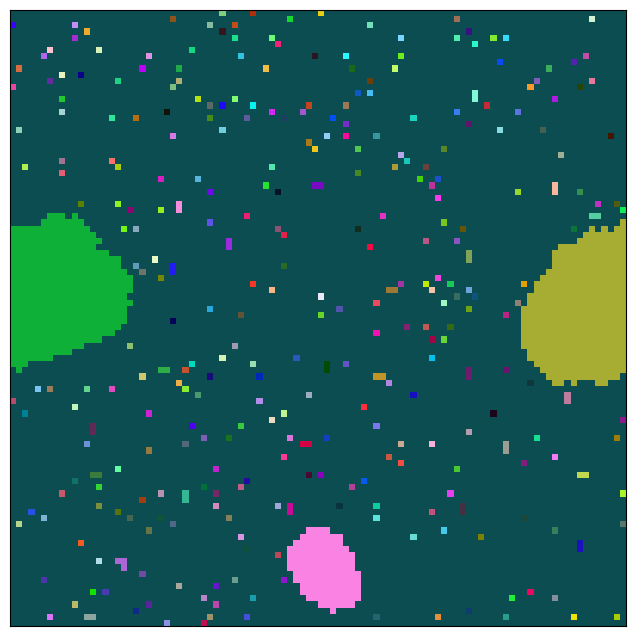

327
{1: 1, 2: 1, 3: 377, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 14: 1, 15: 1, 16: 1, 17: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 2, 40: 2, 41: 2, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 3, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 2, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 2, 88: 1, 89: 1, 90: 1, 91: 1, 92: 2, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 2, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 2, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 14

In [6]:
N = 100
agentDensity = 0.3
residentRelativeDensity = 0.6
timeSteps = 500
plot = False
analizeStart = False
saveImage = False

# creates a city
city = f.create_city(N, agentDensity, residentRelativeDensity)

if analizeStart:
    if int(input()):
        f.simulate(city, timeSteps, plot = plot)
else:
    f.simulate(city, timeSteps, plot = plot, plotEnd = True, saveImage = saveImage, fileName = 'example')


HK_class = f.HoshenKopelman(city)
labels = HK_class.hk(f.merchant_value)
numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()
f.plot_generic_grid(labels)
print(numClusters)
print(clustersSizes)
print(clustersSizesAverage)

In [13]:
# estimate time for 10 densities, 9 relative densities, 5000 time steps and 10 simulations: 2.5 hours
# using threads it gets 1.46 times faster
# one simulation with 5000 time steps takes 14 seconds to run

start = time.time()
N = 150
agentDensityArray = np.linspace(0.1,1,3)
residentRelativeDensityArray = np.linspace(0.1,0.9,3)
timeSteps = 1000
simulations = 5
plot = False
saveImage = False

if saveImage:
    folder = os.getcwd()
    files = os.listdir(folder)
    
    for file in files:
        if file.endswith(".png"):
            filePath = os.path.join(folder, file)
            os.remove(filePath)

numClustersAverageDict = dict()
numClustersDeviationDict = dict()
clustersSizesAverageDict = dict()
clustersSizesDeviationDict = dict()

def sua_funcao(par_inputs):
    agentDensity = par_inputs[0]
    residentRelativeDensity = par_inputs[1]
    numClustersArray = np.zeros(simulations)
    clustersSizesAverageArray = np.zeros(simulations)
    numClustersDeviation = 0
    clustersSizesDeviation = 0
    
    fileName = f"({np.round(agentDensity,3)},{np.round(residentRelativeDensity,3)})"
    for i in range(simulations):
        # creates a city
        city = f.create_city(N, agentDensity, residentRelativeDensity, plot = plot)

        if i == simulations - 1:
            f.simulate(city, timeSteps, plot = plot, plotEnd = False, saveImage = saveImage, fileName = fileName)
            
        else:
            f.simulate(city, timeSteps, plot = plot, plotEnd = False)

        HK_class = f.HoshenKopelman(city)
        HK_class.hk(f.merchant_value)
        numClusters, clustersSizes, clustersSizesAverageAcquired = HK_class.cluster_data()
        numClustersArray[i] = numClusters
        clustersSizesAverageArray[i] = clustersSizesAverageAcquired

    numClustersAverage = float(numClustersArray.sum())/simulations
    clustersSizesAverage = float(clustersSizesAverageArray.sum())/simulations

    difSquaredNumClusters = 0
    difSquaredClustersSizes = 0
    for i in range(simulations):
        difSquaredNumClusters += (numClustersArray[i] - numClustersAverage)*(numClustersArray[i] - numClustersAverage)
        difSquaredClustersSizes += (clustersSizesAverageArray[i] - clustersSizesAverage)*(clustersSizesAverageArray[i] - clustersSizesAverage)

    numClustersDeviation = np.sqrt(float(difSquaredNumClusters)/simulations)
    clustersSizesDeviation = np.sqrt(float(difSquaredClustersSizes)/simulations)

    results = np.array([np.round(numClustersAverage,1), np.round(numClustersDeviation,1), np.round(clustersSizesAverage,1), np.round(clustersSizesDeviation,1)])
    return results  

def executar_em_paralelo(lista_pares_inputs):
    # Número de threads a serem usadas
    num_threads = os.cpu_count()

    # Criando um ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Iniciando as operações em paralelo
        futures = [executor.submit(sua_funcao, par) for par in lista_pares_inputs]

        # Aguardando a conclusão de todas as operações
        resultados = [future.result() for future in futures]

    # Criando o dicionário associando cada resultado aos seus inputs
    resultados_dict = {par: resultado for par, resultado in zip(lista_pares_inputs, resultados)}
    return resultados_dict

inputsArray = []
for agentDensity in agentDensityArray:
    for residentRelativeDensity in residentRelativeDensityArray:
        inputsArray.append((np.round(agentDensity,3), np.round(residentRelativeDensity,3)))

resultados_paralelos = executar_em_paralelo(inputsArray)

end = time.time()
print(end - start)

282.7062294483185


In [11]:
for key, value in resultados_paralelos.items():
    numClustersAverageDict[key] = value[0]
    numClustersDeviationDict[key] = value[1]
    clustersSizesAverageDict[key] = value[2]
    clustersSizesDeviationDict[key] = value[3]

{(0.1, 0.1): 1661.6, (0.1, 0.5): 1015.2, (0.1, 0.9): 219.2, (0.55, 0.1): 508.4, (0.55, 0.5): 146.4, (0.55, 0.9): 455.6, (1.0, 0.1): 4.4, (1.0, 0.5): 1559.2, (1.0, 0.9): 1810.6}


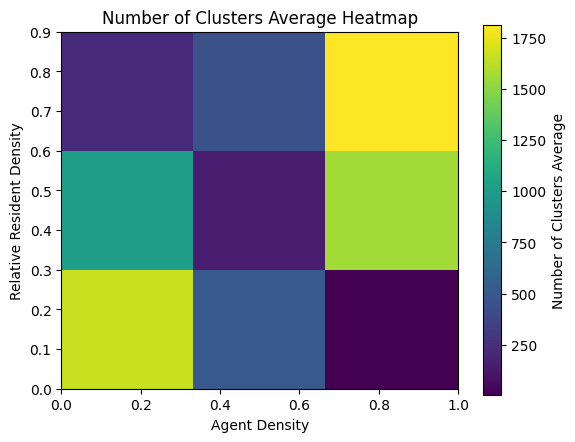

{(0.1, 0.1): 5.0, (0.1, 0.5): 5.3, (0.1, 0.9): 2.3, (0.55, 0.1): 70.9, (0.55, 0.5): 19.2, (0.55, 0.9): 12.1, (1.0, 0.1): 2.1, (1.0, 0.5): 31.1, (1.0, 0.9): 8.8}


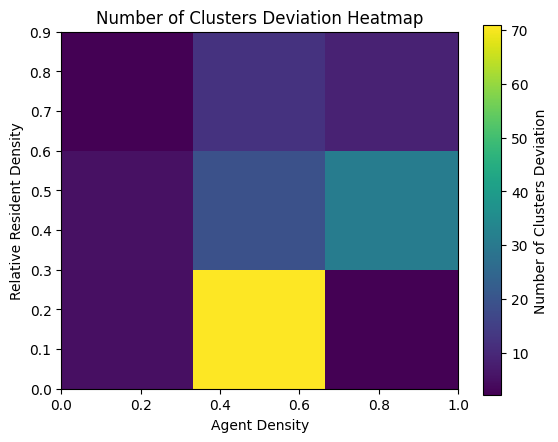

{(0.1, 0.1): 1.2, (0.1, 0.5): 1.1, (0.1, 0.9): 1.0, (0.55, 0.1): 22.3, (0.55, 0.5): 43.0, (0.55, 0.9): 2.7, (1.0, 0.1): 5703.8, (1.0, 0.5): 7.2, (1.0, 0.9): 1.2}


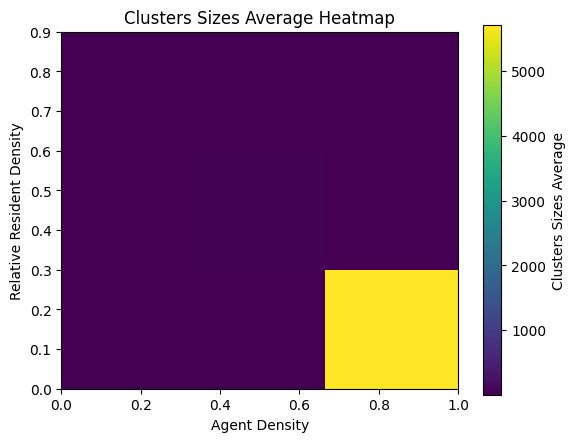

{(0.1, 0.1): 0.0, (0.1, 0.5): 0.0, (0.1, 0.9): 0.0, (0.55, 0.1): 2.6, (0.55, 0.5): 5.5, (0.55, 0.9): 0.1, (1.0, 0.1): 2602.0, (1.0, 0.5): 0.1, (1.0, 0.9): 0.0}


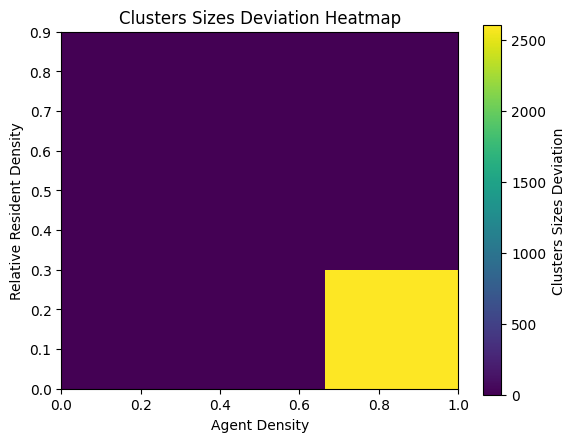

In [12]:
print(numClustersAverageDict)
generate_heatmap(numClustersAverageDict, 'Number of Clusters Average')
print(numClustersDeviationDict)
generate_heatmap(numClustersDeviationDict, 'Number of Clusters Deviation')
print(clustersSizesAverageDict)
generate_heatmap(clustersSizesAverageDict, 'Clusters Sizes Average')
print(clustersSizesDeviationDict)
generate_heatmap(clustersSizesDeviationDict, 'Clusters Sizes Deviation')